!pip install imblearn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


from imblearn.under_sampling import RandomUnderSampler

from sklearn.datasets import make_classification

In [292]:
#load dataset
# df=pd.read_csv('/YZ/Google drive/A_2023FallUMBC/Capstone/dataset/Cleaned/concatenated_df.csv', encoding='cp1252',low_memory=False)
df=pd.read_csv('/My Drive/A_2023FallUMBC/Capstone/dataset/Cleaned/concatenated_df.csv', encoding='cp1252',low_memory=False)

In [79]:
df.head()

,Unnamed: 0,index,state,age,sex,race,employ,educag,income,marital,...,physical_activity,smoking,alcohol,stroke,depression,kidney_disease,DM,heart_disease,dementia,bphigh
0,0,0,1,6,NaN,1.0,7.0,4,NaN,1.0,...,2,NaN,2,2.0,2.0,2.0,1.0,2.0,NaN,NaN
1,1,1,1,6,NaN,1.0,2.0,2,3.0,3.0,...,2,NaN,2,2.0,2.0,2.0,3.0,2.0,NaN,NaN
2,2,2,1,5,2.0,1.0,7.0,4,5.0,1.0,...,1,NaN,2,2.0,2.0,2.0,3.0,2.0,NaN,NaN
3,3,3,1,6,NaN,1.0,7.0,2,NaN,1.0,...,1,2.0,2,2.0,2.0,2.0,3.0,2.0,NaN,NaN
4,4,4,1,3,NaN,1.0,5.0,3,3.0,1.0,...,1,NaN,1,2.0,2.0,2.0,3.0,2.0,NaN,NaN


In [293]:
df.shape

(2591503, 23)

In [294]:
df.drop(['Unnamed: 0'], axis= 1, inplace =True)

In [287]:
df.columns

Index(['index', 'state', 'age', 'sex', 'race', 'employ', 'educag', 'income',
       'marital', 'urban_rural', 'healthcare_access', 'obese',
       'physical_activity', 'smoking', 'alcohol', 'stroke', 'depression',
       'kidney_disease', 'DM', 'heart_disease', 'dementia', 'bphigh'],
      dtype='object')

In [195]:
#missing values
df.isnull().sum()

index                      0
state                      0
age                        0
sex                  1495798
race                  143531
employ                 16810
educag                     0
income                501501
marital                  116
urban_rural           488550
healthcare_access        912
obese                      0
physical_activity          0
smoking              1569048
alcohol                    0
stroke                    43
depression                53
kidney_disease            49
DM                     17614
heart_disease             40
dementia             2516350
bphigh               1311939
dtype: int64

In [84]:
#Show proportion of null values for each column
(1-(df.count()/len(df))).sort_values(ascending= False)

dementia             0.971000
smoking              0.605459
sex                  0.577193
bphigh               0.506246
income               0.193517
urban_rural          0.188520
race                 0.055385
DM                   0.006797
employ               0.006487
healthcare_access    0.000352
marital              0.000045
depression           0.000020
kidney_disease       0.000019
stroke               0.000017
heart_disease        0.000015
index                0.000000
alcohol              0.000000
physical_activity    0.000000
state                0.000000
educag               0.000000
age                  0.000000
obese                0.000000
dtype: float64

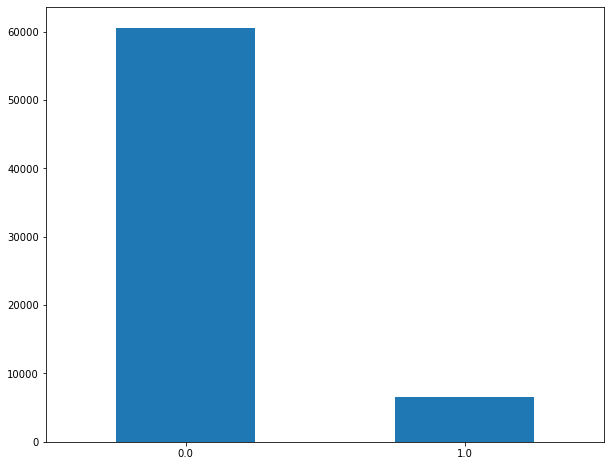

In [284]:
fig, ax = plt.subplots(figsize=(10,8))
df['dementia'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [295]:
# drop coloum with missing values
df.dropna(subset=['dementia'],inplace=True)
print(df.shape)

(75153, 22)


In [86]:
df.isnull().sum()

index                    0
state                    0
age                      0
sex                  62082
race                  3292
employ                   0
educag                   0
income               11192
marital                  0
urban_rural           5840
healthcare_access        0
obese                    0
physical_activity        0
smoking              41755
alcohol                  0
stroke                   0
depression               0
kidney_disease           0
DM                     244
heart_disease            0
dementia                 0
bphigh               27954
dtype: int64

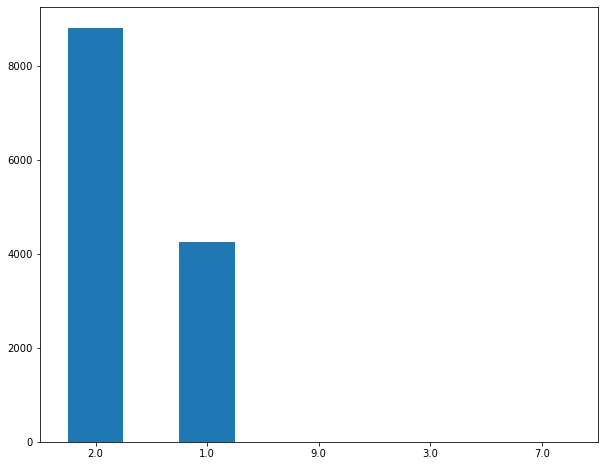

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
df['sex'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

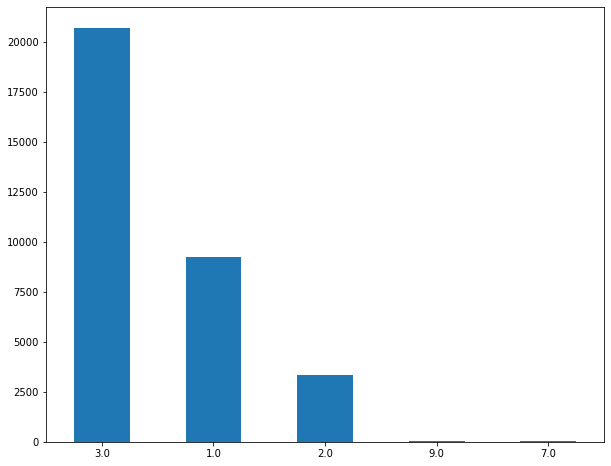

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
df['smoking'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

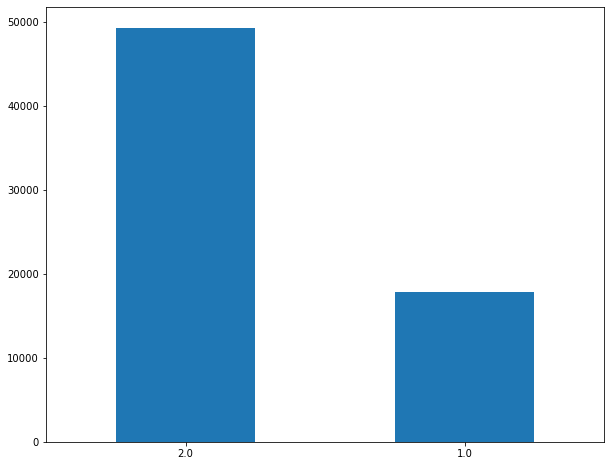

2.0    49314
1.0    17886
Name: depression, dtype: int64


In [215]:
fig, ax = plt.subplots(figsize=(10,8))
df['depression'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()
print(df['depression'].value_counts())

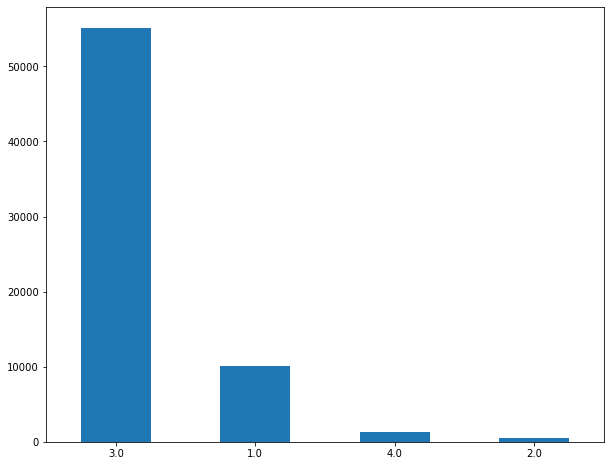

In [254]:
fig, ax = plt.subplots(figsize=(10,8))
df['DM'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

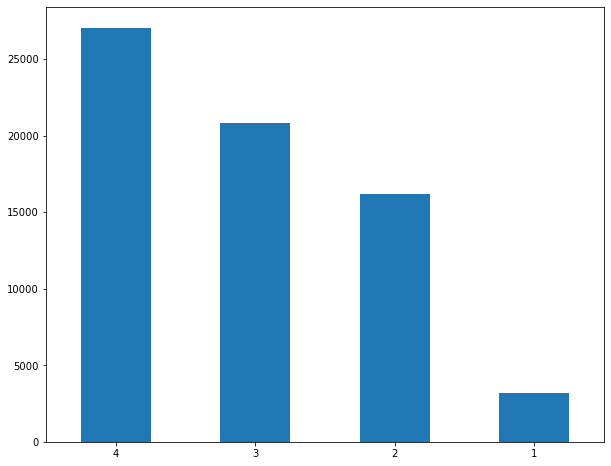

In [226]:
fig, ax = plt.subplots(figsize=(10,8))
df['educag'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

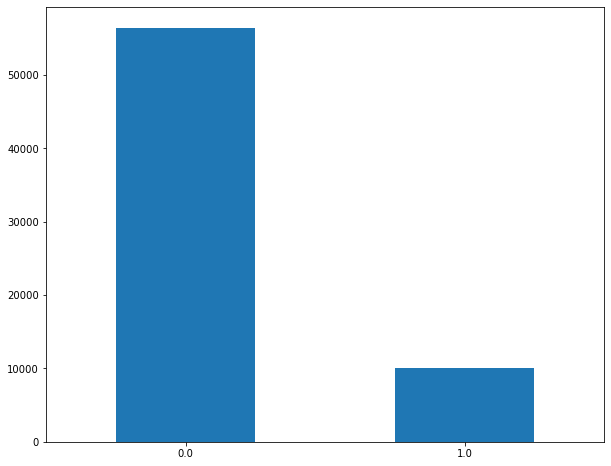

0.0    56435
1.0    10037
Name: DM, dtype: int64


In [302]:
fig, ax = plt.subplots(figsize=(10,8))
df['DM'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()
print(df['DM'].value_counts())

In [139]:
print(df.shape)

(75153, 22)


In [296]:
#Only 3 datasets have hypertension data, drop bphigh 
df.drop(['bphigh'], axis= 1, inplace =True)
# 2015 & 2016 dataset no urban_rural
df.drop(['urban_rural'], axis= 1, inplace =True)


In [297]:
# drop vlaues:DK, refused

df = df[~df['sex'].isin([3,7,9])]
df = df[~df['race'].isin([6])]
df = df[~df['employ'].isin([9])]
df = df[~df['educag'].isin([9])]
df = df[~df['marital'].isin([9])]
df = df[~df['healthcare_access'].isin([7,9])]
df = df[~df['obese'].isin([9])]
df = df[~df['physical_activity'].isin([9])]
df = df[~df['smoking'].isin([7,9])]
df = df[~df['alcohol'].isin([7,9])]
df = df[~df['stroke'].isin([7,9])]
df = df[~df['depression'].isin([7,9])]
df = df[~df['kidney_disease'].isin([7,9])]
df = df[~df['DM'].isin([7,9])]
df = df[~df['heart_disease'].isin([7,9])]



In [298]:
#replace 2=0, meaning no 

df['obese'].replace({2: 0}, inplace=True)
df['physical_activity'].replace({2: 0}, inplace=True)
df['alcohol'].replace({2: 0}, inplace=True)
df['stroke'].replace({2: 0}, inplace=True)
df['depression'].replace({2: 0}, inplace=True)
df['kidney_disease'].replace({2: 0}, inplace=True)
df['heart_disease'].replace({2: 0}, inplace=True)
df['DM'].replace({2:np.nan,3: 0,4:0}, inplace=True)

In [299]:
print(df['DM'].value_counts())

0.0    56435
1.0    10037
Name: DM, dtype: int64


In [300]:
print(df.shape)

(67200, 20)


In [225]:
df.isnull().sum()

index                    0
state                    0
age                      0
sex                  55401
race                  2765
employ                   0
educag                   0
income                8691
marital                  0
urban_rural           5243
healthcare_access        0
obese                    0
physical_activity        0
smoking              37201
alcohol                  0
stroke                   0
depression               0
kidney_disease           0
DM                     212
heart_disease            0
dementia                 0
dtype: int64

In [27]:
#df['race'].fillna(df['race'].mode()[0], inplace=True)
#df['urban_rural'].fillna(df['urban_rural'].mode()[0], inplace=True)
#df['smoking'].fillna(df['smoking'].mode()[0], inplace=True)
#df['DM'].fillna(df['DM'].mode()[0], inplace=True)

In [303]:
#save final dataset
# 67200 , 21 variables

# Specify the path where you want to save the CSV file
csv_file_path = '/My Drive/A_2023FallUMBC/Capstone/dataset/final/new_dataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Print a message indicating success
print(f'DataFrame saved to CSV: {csv_file_path}')


DataFrame saved to CSV: /My Drive/A_2023FallUMBC/Capstone/dataset/final/new_dataset.csv


## Merge all datasets (2022-2015)
total 8 years

In [304]:
#reload new dataset
df=pd.read_csv('/My Drive/A_2023FallUMBC/Capstone/dataset/final/new_dataset.csv', encoding='cp1252',low_memory=False)

In [346]:
print(df.shape)
df.head(20)

(67200, 20)


,index,state,age,sex,race,employ,educag,income,marital,healthcare_access,obese,physical_activity,smoking,alcohol,stroke,depression,kidney_disease,DM,heart_disease,dementia
0,76594,13,3,NaN,1.0,1.0,3,3.0,6.0,1.0,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,76611,13,6,NaN,1.0,7.0,1,NaN,3.0,1.0,1,1,NaN,0,0.0,1.0,1.0,1.0,0.0,0.0
2,76615,13,6,NaN,1.0,7.0,3,3.0,1.0,1.0,1,1,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0
3,76616,13,6,NaN,1.0,7.0,3,3.0,1.0,2.0,1,0,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0
4,76624,13,5,NaN,1.0,8.0,4,2.0,2.0,3.0,1,0,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0
5,76626,13,5,NaN,1.0,5.0,1,3.0,1.0,1.0,1,0,2.0,0,0.0,1.0,0.0,0.0,0.0,1.0
6,76629,13,6,NaN,1.0,7.0,4,NaN,1.0,2.0,0,1,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
7,76634,13,6,2.0,1.0,7.0,2,3.0,3.0,2.0,1,0,3.0,0,0.0,0.0,0.0,0.0,0.0,1.0
8,76635,13,6,NaN,1.0,7.0,3,5.0,1.0,1.0,0,1,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0
9,76657,13,6,2.0,1.0,7.0,2,NaN,2.0,2.0,0,1,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0


In [342]:
#reload new1516 dataset
df1516=pd.read_csv('/My Drive/A_2023FallUMBC/Capstone/Capstone_python/new1516_df.csv', encoding='cp1252',low_memory=False)

In [343]:
print(df1516.shape)
df1516.head(20)

(34051, 21)


,Unnamed: 0,index,state,age,sex,race,employ,educag,income,marital,...,obese,physical_activity,smoking,alcohol,stroke,depression,kidney_disease,DM,heart_disease,dementia
0,15,15,1,6,2,1.0,5.0,2,2.0,3.0,...,1,1,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,27,27,1,4,1,1.0,8.0,2,1.0,1.0,...,1,0,NaN,0,0.0,1.0,0.0,0.0,0.0,1.0
2,34,34,1,3,2,1.0,8.0,4,1.0,1.0,...,1,1,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0
3,37,37,1,4,1,1.0,1.0,3,4.0,1.0,...,0,1,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,41,41,1,2,2,1.0,3.0,1,1.0,1.0,...,0,0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,44,44,1,6,2,1.0,7.0,2,2.0,2.0,...,0,0,NaN,0,1.0,1.0,0.0,0.0,0.0,0.0
6,46,46,1,6,2,1.0,5.0,2,NaN,1.0,...,1,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
7,51,51,1,6,2,1.0,8.0,1,NaN,3.0,...,0,1,NaN,0,1.0,0.0,0.0,0.0,0.0,1.0
8,56,56,1,6,2,2.0,7.0,3,2.0,3.0,...,1,1,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0
9,60,60,1,5,2,1.0,1.0,2,4.0,1.0,...,1,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [345]:
df1516.drop(['Unnamed: 0'], axis= 1, inplace =True)

In [347]:
# merge all dataset
all_df= pd.merge(df, df1516, on='index', how='outer')

# Concatenate them along the rows
all_df= pd.concat([df, df1516], axis=0)

print(all_df.shape)
all_df.head(20)

(101251, 20)


,index,state,age,sex,race,employ,educag,income,marital,healthcare_access,obese,physical_activity,smoking,alcohol,stroke,depression,kidney_disease,DM,heart_disease,dementia
0,76594,13,3,NaN,1.0,1.0,3,3.0,6.0,1.0,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,76611,13,6,NaN,1.0,7.0,1,NaN,3.0,1.0,1,1,NaN,0,0.0,1.0,1.0,1.0,0.0,0.0
2,76615,13,6,NaN,1.0,7.0,3,3.0,1.0,1.0,1,1,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0
3,76616,13,6,NaN,1.0,7.0,3,3.0,1.0,2.0,1,0,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0
4,76624,13,5,NaN,1.0,8.0,4,2.0,2.0,3.0,1,0,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0
5,76626,13,5,NaN,1.0,5.0,1,3.0,1.0,1.0,1,0,2.0,0,0.0,1.0,0.0,0.0,0.0,1.0
6,76629,13,6,NaN,1.0,7.0,4,NaN,1.0,2.0,0,1,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
7,76634,13,6,2.0,1.0,7.0,2,3.0,3.0,2.0,1,0,3.0,0,0.0,0.0,0.0,0.0,0.0,1.0
8,76635,13,6,NaN,1.0,7.0,3,5.0,1.0,1.0,0,1,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0
9,76657,13,6,2.0,1.0,7.0,2,NaN,2.0,2.0,0,1,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0


In [348]:
#save all datasets
# Specify the path where you want to save the CSV file
csv_file_path = '/My Drive/A_2023FallUMBC/Capstone/dataset/final/all_df.csv'

# Save the DataFrame to a CSV file
all_df.to_csv(csv_file_path, index=False)

# Print a message indicating success
print(f'DataFrame saved to CSV: {csv_file_path}')

DataFrame saved to CSV: /My Drive/A_2023FallUMBC/Capstone/dataset/final/all_df.csv


In [349]:
#reload all dataset
df=pd.read_csv('/My Drive/A_2023FallUMBC/Capstone/dataset/final/all_df.csv', encoding='cp1252',low_memory=False)

In [350]:
print(df.shape)
df.head(20)

(101251, 20)


,index,state,age,sex,race,employ,educag,income,marital,healthcare_access,obese,physical_activity,smoking,alcohol,stroke,depression,kidney_disease,DM,heart_disease,dementia
0,76594,13,3,NaN,1.0,1.0,3,3.0,6.0,1.0,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,76611,13,6,NaN,1.0,7.0,1,NaN,3.0,1.0,1,1,NaN,0,0.0,1.0,1.0,1.0,0.0,0.0
2,76615,13,6,NaN,1.0,7.0,3,3.0,1.0,1.0,1,1,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0
3,76616,13,6,NaN,1.0,7.0,3,3.0,1.0,2.0,1,0,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0
4,76624,13,5,NaN,1.0,8.0,4,2.0,2.0,3.0,1,0,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0
5,76626,13,5,NaN,1.0,5.0,1,3.0,1.0,1.0,1,0,2.0,0,0.0,1.0,0.0,0.0,0.0,1.0
6,76629,13,6,NaN,1.0,7.0,4,NaN,1.0,2.0,0,1,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
7,76634,13,6,2.0,1.0,7.0,2,3.0,3.0,2.0,1,0,3.0,0,0.0,0.0,0.0,0.0,0.0,1.0
8,76635,13,6,NaN,1.0,7.0,3,5.0,1.0,1.0,0,1,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0
9,76657,13,6,2.0,1.0,7.0,2,NaN,2.0,2.0,0,1,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0


In [352]:
df.columns

Index(['index', 'state', 'age', 'sex', 'race', 'employ', 'educag', 'income',
       'marital', 'healthcare_access', 'obese', 'physical_activity', 'smoking',
       'alcohol', 'stroke', 'depression', 'kidney_disease', 'DM',
       'heart_disease', 'dementia'],
      dtype='object')


## Descriptive analysis

In [351]:
# all data
df['dementia'].value_counts()

0.0    91271
1.0     9980
Name: dementia, dtype: int64

In [341]:
print(df.shape)

(67200, 20)


In [329]:
# Descriptive analysis
summary_stats = df.describe()
print(summary_stats)


               index         state           age           sex          race  \
count   67200.000000  67200.000000  67200.000000  11799.000000  64435.000000   
mean   250660.858824     34.470595      4.595223      1.664124      1.228509   
std    131693.173153     16.273034      1.437812      0.472316      0.625545   
min         9.000000      1.000000      1.000000      1.000000      1.000000   
25%    100312.750000     19.000000      4.000000      1.000000      1.000000   
50%    297864.000000     39.000000      5.000000      2.000000      1.000000   
75%    362012.250000     48.000000      6.000000      2.000000      1.000000   
max    443590.000000     72.000000      6.000000      2.000000      4.000000   

             employ        educag        income       marital  \
count  67200.000000  67200.000000  58509.000000  67200.000000   
mean       3.931637      3.068170      3.949256      2.122485   
std        2.846881      0.909028      1.331641      1.616919   
min        1.000000

In [330]:
df.columns

Index(['index', 'state', 'age', 'sex', 'race', 'employ', 'educag', 'income',
       'marital', 'healthcare_access', 'obese', 'physical_activity', 'smoking',
       'alcohol', 'stroke', 'depression', 'kidney_disease', 'DM',
       'heart_disease', 'dementia'],
      dtype='object')

In [355]:
# descriptive analysis for all data
# create categorical_columns and class_column
categorical_columns = ['age','sex', 'race', 'employ', 'educag', 'income',
       'marital', 'healthcare_access', 'obese', 'physical_activity', 'smoking',
       'alcohol', 'stroke', 'depression', 'kidney_disease', 'DM',
       'heart_disease']
class_column = df['dementia'] 


# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Iterate through each categorical column
for col in categorical_columns:
    # Group by the categorical column and class, then count and normalize
    counts = df.groupby([col, class_column]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=0), axis=1) * 100

    # Rename columns for clarity
    counts.columns = [f'{col}_{cls}_Count' for cls in counts.columns]
    percentages.columns = [f'{col}_{cls}_Percentage' for cls in percentages.columns]

    # Concatenate counts and percentages into a single DataFrame for the current column
    col_result = pd.concat([counts, percentages], axis=1)

    # Concatenate the results for the current column to the overall result_df
    result_df = pd.concat([result_df, col_result], axis=1)

# Display the final result
print(result_df)


     age_0.0_Count  age_1.0_Count  age_0.0_Percentage  age_1.0_Percentage  \
1.0         3558.0          258.0            3.898281            2.585170   
2.0         6937.0          469.0            7.600443            4.699399   
3.0        10967.0          691.0           12.015865            6.923848   
4.0        16335.0         1669.0           17.897251           16.723447   
5.0        22650.0         3162.0           24.816207           31.683367   
6.0        30824.0         3731.0           33.771954           37.384770   
7.0            NaN            NaN                 NaN                 NaN   
8.0            NaN            NaN                 NaN                 NaN   
0.0            NaN            NaN                 NaN                 NaN   

     sex_0.0_Count  sex_1.0_Count  sex_0.0_Percentage  sex_1.0_Percentage  \
1.0        14836.0         1595.0           36.012331            34.27896   
2.0        26361.0         3058.0           63.987669            65.72104  

In [356]:
# Save the result DataFrame to a CSV file


# Specify the path where you want to save the CSV file
csv_file_path = '/My Drive/A_2023FallUMBC/Capstone/dataset/final/result_descriptive.csv'

# Save the DataFrame to a CSV file
result_df.to_csv(csv_file_path, index=False)

# Print a message indicating success
print(f'DataFrame saved to CSV: {csv_file_path}')


DataFrame saved to CSV: /My Drive/A_2023FallUMBC/Capstone/dataset/final/result_descriptive.csv


## Exploratory Analysis

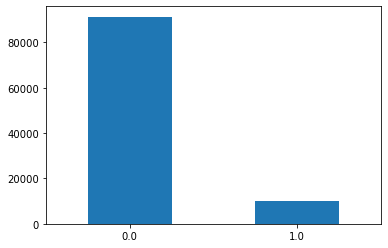

0.0    91271
1.0     9980
Name: dementia, dtype: int64


In [357]:
fig, ax = plt.subplots(figsize=(6,4))
df['dementia'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

print(df['dementia'].value_counts())

In [359]:
df_state = df[['state', 'dementia']]

#replace number to state name
#df['state'].replace[]
Dementia_count = df_state['state'].value_counts()
Dementia_count.head()

41    6084
39    4769
27    4756
13    4640
51    4525
Name: state, dtype: int64

41    6084
39    4769
27    4756
13    4640
51    4525
15    4504
34    4322
45    3691
53    3600
55    3479
48    3443
47    3430
54    3310
29    3040
28    2795
22    2718
18    2499
21    2461
1     2435
19    2269
35    2128
42    2081
16    1998
5     1862
44    1736
46    1713
72    1709
56    1647
12    1608
49    1606
38    1521
2     1365
9     1152
17    1125
50     939
32     930
33     892
30     820
37     616
11     561
10     472
Name: state, dtype: int64


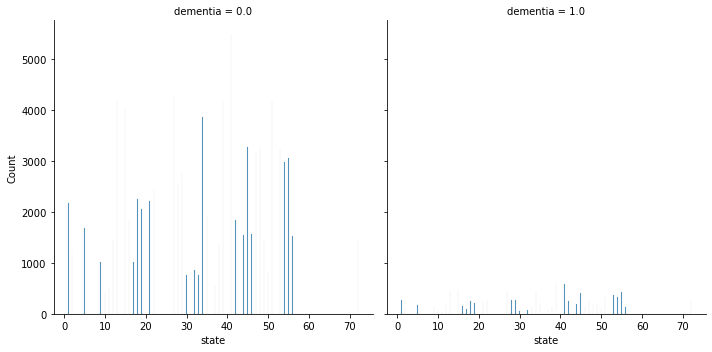

In [360]:
#make a table
sns.displot(
  data=df_state,
  x="state",
  col ='dementia',
  kind="hist",
  binwidth=0.1
  
)
print(df_state['state'].value_counts())

4    39026
3    31326
2    25607
1     5292
Name: educag, dtype: int64


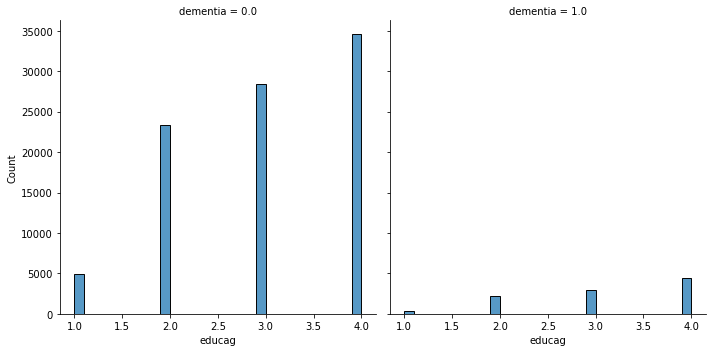

In [361]:
sns.displot(
  data=df,
  x="educag",
  col ='dementia',
  kind="hist",
  binwidth=0.1
  
)
print(df['educag'].value_counts())

## Distribution for education and dementia

In [362]:
#test crosstable edcation and dementia
# Create a crosstab table with percentages
crosstab_percentage = pd.crosstab(index=df['educag'], 
                                   columns=[df['dementia']],
                                   normalize='index') * 100

# Print the crosstab table with percentages
print(crosstab_percentage)

#education:
#1= Did not graduate High School ,2= Graduated High School, 3= Attended College or Technical School,
#4= Graduated from College or Technical School


dementia        0.0        1.0
educag                        
1         92.649282   7.350718
2         91.400789   8.599211
3         90.675477   9.324523
4         88.551222  11.448778


In [363]:
#check education catogary
# choose having dementia
condition = (df['dementia'] == 1)

# Count the occurrences of values in the education column when the condition is True
educag_value_percentage = df.loc[condition, 'educag'].value_counts(normalize=True) * 100

educag_value_counts = df.loc[condition, 'educag'].value_counts()
print(educag_value_counts)
print(educag_value_percentage)

4    4468
3    2921
2    2202
1     389
Name: educag, dtype: int64
4    44.769539
3    29.268537
2    22.064128
1     3.897796
Name: educag, dtype: float64


In [364]:
# choose no having dementia
condition = (df['dementia'] == 0)

# Count the occurrences of values in the education column 
educag_value_percentage = df.loc[condition, 'educag'].value_counts(normalize=True) * 100

educag_value_counts = df.loc[condition, 'educag'].value_counts()
print(educag_value_counts)
print(educag_value_percentage)

4    34558
3    28405
2    23405
1     4903
Name: educag, dtype: int64
4    37.863067
3    31.121605
2    25.643414
1     5.371914
Name: educag, dtype: float64


## Distribution for education and alcohol use, smoking

In [365]:
#test crosstable edcation and alcohol


# Create a crosstab table with percentages
crosstab_percentage = pd.crosstab(index=df['educag'], 
                                   columns=[df['alcohol']],
                                   normalize='index') * 100

# Print the crosstab table with percentages
print(crosstab_percentage)

#alcohol: yes=1

alcohol          0          1
educag                       
1        69.066515  30.933485
2        59.175226  40.824774
3        51.107706  48.892294
4        41.572285  58.427715


In [366]:

#test crosstable edcation and smoking
crosstab_percentage = pd.crosstab(index=df['educag'], 
                                   columns=[df['smoking']],
                                   normalize='index') * 100

# Print the crosstab table with percentages
print(crosstab_percentage)

#smoking:1 everyday 2 some days 3 not at all 7

smoking        1.0        2.0        3.0
educag                                  
1        45.261344  12.492820  42.245836
2        35.203896  11.521407  53.274697
3        29.318868  11.099698  59.581434
4        16.497346   8.127369  75.375284


In [367]:
#final all data 
#101251respondents, 20 variables
df.shape

(101251, 20)

In [368]:
df.columns


Index(['index', 'state', 'age', 'sex', 'race', 'employ', 'educag', 'income',
       'marital', 'healthcare_access', 'obese', 'physical_activity', 'smoking',
       'alcohol', 'stroke', 'depression', 'kidney_disease', 'DM',
       'heart_disease', 'dementia'],
      dtype='object')

## Transformer

In [309]:
#Transformer
#Defining the preprocessing steps: imputes missing values in numerical data, 
#and imputes missing values and applies a one-hot encoding to categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [369]:
#reload traning dataset(2022-1017)
df=pd.read_csv('/My Drive/A_2023FallUMBC/Capstone/dataset/final/new_dataset.csv', encoding='cp1252',low_memory=False)

In [370]:
df.shape

(67200, 20)

In [310]:
x=df[['age', 'sex','race','employ','educag','income','marital','healthcare_access','obese','physical_activity','smoking','alcohol',
                  'stroke','depression','kidney_disease','DM','heart_disease']]
y=df[['dementia']]


In [311]:
x.head()

,age,sex,race,employ,educag,income,marital,healthcare_access,obese,physical_activity,smoking,alcohol,stroke,depression,kidney_disease,DM,heart_disease
0,3,NaN,1.0,1.0,3,3.0,6.0,1.0,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0
1,6,NaN,1.0,7.0,1,NaN,3.0,1.0,1,1,NaN,0,0.0,1.0,1.0,1.0,0.0
2,6,NaN,1.0,7.0,3,3.0,1.0,1.0,1,1,NaN,1,0.0,0.0,0.0,0.0,0.0
3,6,NaN,1.0,7.0,3,3.0,1.0,2.0,1,0,NaN,1,0.0,0.0,0.0,0.0,0.0
4,5,NaN,1.0,8.0,4,2.0,2.0,3.0,1,0,NaN,1,0.0,0.0,0.0,0.0,0.0


In [312]:
print(x.shape)

(67200, 17)


In [313]:
y.head()

,dementia
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [314]:
#deal with imbalaced class
import imblearn

# find class distribution ratio
df['dementia'].value_counts()
inactive= len(df[df['dementia']==0])
active=len(df[df['dementia']==1])
class_distribution_ratio = inactive/active
class_distribution_ratio

# a ratio of 9:1 for the majority to the minority class

9.177192185370286

In [315]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config

In [316]:
# Transformer Pipeline
#determine categorical/binary features
#18 IVs
binary_features =['sex','obese','physical_activity','alcohol','stroke','depression','kidney_disease','heart_disease','DM']
categorical_features = ['age','race','employ','educag','income','marital','healthcare_access','smoking']
label_column = ['age', 'sex','race','employ','educag','income','marital','urban_rural','healthcare_access','obese','physical_activity','smoking','alcohol',
                  'stroke','depression','kidney_disease','DM','heart_disease']


# here we call the new API set_config to tell sklearn we want to output a pandas DF
#set_config:keep the feature names in sklearn Pipelines. 
sklearn.set_config(transform_output="pandas")

#define the data preparation for features
#Onehot Encoder:convert categorical variables into binary vectors through one-hot encoding.

preprocessor= ColumnTransformer(
    transformers=[
        ('binary_p',Pipeline([
            ('impute', SimpleImputer(strategy='most_frequent')),]), binary_features),
        ('cat_p',Pipeline([
            ('impute', SimpleImputer(strategy='most_frequent')),
            ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_features)
    ],
        verbose_feature_names_out=False
    )

In [317]:
#fit transform
X_transformed = preprocessor.fit_transform(x)

#become dataframe
X_transform_df = pd.DataFrame(X_transformed)

X_transform_df.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,sex,obese,physical_activity,alcohol,stroke,depression,kidney_disease,heart_disease,DM,age_1.0,...,marital_3.0,marital_4.0,marital_5.0,marital_6.0,healthcare_access_1.0,healthcare_access_2.0,healthcare_access_3.0,smoking_1.0,smoking_2.0,smoking_3.0
0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [318]:
X_transform_df.columns

Index(['sex', 'obese', 'physical_activity', 'alcohol', 'stroke', 'depression',
       'kidney_disease', 'heart_disease', 'DM', 'age_1.0', 'age_2.0',
       'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'race_1.0', 'race_2.0',
       'race_3.0', 'race_4.0', 'employ_1.0', 'employ_2.0', 'employ_3.0',
       'employ_4.0', 'employ_5.0', 'employ_6.0', 'employ_7.0', 'employ_8.0',
       'educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0', 'income_1.0',
       'income_2.0', 'income_3.0', 'income_4.0', 'income_5.0', 'marital_1.0',
       'marital_2.0', 'marital_3.0', 'marital_4.0', 'marital_5.0',
       'marital_6.0', 'healthcare_access_1.0', 'healthcare_access_2.0',
       'healthcare_access_3.0', 'smoking_1.0', 'smoking_2.0', 'smoking_3.0'],
      dtype='object')

In [319]:
X_transform_df.shape

(67200, 48)

In [320]:
#check missing data
pd.DataFrame(X_transformed).notna().sum() * 100 / len(pd.DataFrame(X_transformed))


sex                      100.0
obese                    100.0
physical_activity        100.0
alcohol                  100.0
stroke                   100.0
depression               100.0
kidney_disease           100.0
heart_disease            100.0
DM                       100.0
age_1.0                  100.0
age_2.0                  100.0
age_3.0                  100.0
age_4.0                  100.0
age_5.0                  100.0
age_6.0                  100.0
race_1.0                 100.0
race_2.0                 100.0
race_3.0                 100.0
race_4.0                 100.0
employ_1.0               100.0
employ_2.0               100.0
employ_3.0               100.0
employ_4.0               100.0
employ_5.0               100.0
employ_6.0               100.0
employ_7.0               100.0
employ_8.0               100.0
educag_1.0               100.0
educag_2.0               100.0
educag_3.0               100.0
educag_4.0               100.0
income_1.0               100.0
income_2

In [321]:
# Resetting the index and creating a default integer index for DV
X_transform_df.reset_index(inplace=True)

#check columns
print(type(X_transform_df))
print(X_transform_df.shape)
X_transform_df.columns

<class 'pandas.core.frame.DataFrame'>
(67200, 49)


Index(['index', 'sex', 'obese', 'physical_activity', 'alcohol', 'stroke',
       'depression', 'kidney_disease', 'heart_disease', 'DM', 'age_1.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'race_1.0',
       'race_2.0', 'race_3.0', 'race_4.0', 'employ_1.0', 'employ_2.0',
       'employ_3.0', 'employ_4.0', 'employ_5.0', 'employ_6.0', 'employ_7.0',
       'employ_8.0', 'educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0',
       'income_1.0', 'income_2.0', 'income_3.0', 'income_4.0', 'income_5.0',
       'marital_1.0', 'marital_2.0', 'marital_3.0', 'marital_4.0',
       'marital_5.0', 'marital_6.0', 'healthcare_access_1.0',
       'healthcare_access_2.0', 'healthcare_access_3.0', 'smoking_1.0',
       'smoking_2.0', 'smoking_3.0'],
      dtype='object')

In [322]:
X_transform_df.head()

,index,sex,obese,physical_activity,alcohol,stroke,depression,kidney_disease,heart_disease,DM,...,marital_3.0,marital_4.0,marital_5.0,marital_6.0,healthcare_access_1.0,healthcare_access_2.0,healthcare_access_3.0,smoking_1.0,smoking_2.0,smoking_3.0
0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [323]:
X_transform_df['DM'].value_counts()

0.0    57163
1.0    10037
Name: DM, dtype: int64

In [324]:
# Resetting the index for IV
y.reset_index(inplace=True)

In [325]:
print(type(y))
print(y.shape)
y.columns

<class 'pandas.core.frame.DataFrame'>
(67200, 2)


Index(['index', 'dementia'], dtype='object')

In [326]:
# merge  DI and VI dateset
merged_df = pd.merge(X_transform_df, y, on='index', how='outer')

merged_df.head(20)

,index,sex,obese,physical_activity,alcohol,stroke,depression,kidney_disease,heart_disease,DM,...,marital_4.0,marital_5.0,marital_6.0,healthcare_access_1.0,healthcare_access_2.0,healthcare_access_3.0,smoking_1.0,smoking_2.0,smoking_3.0,dementia
0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5,5,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,6,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,7,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
8,8,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,9,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [327]:
# Save final transform dataset
# Specify the path where you want to save the CSV file
csv_file_path = '/My Drive/A_2023FallUMBC/Capstone/dataset/final/transform_dataset.csv'

# Save the DataFrame to a CSV file
merged_df.to_csv(csv_file_path, index=False)

# Print a message indicating success
print(f'DataFrame saved to CSV: {csv_file_path}')

DataFrame saved to CSV: /My Drive/A_2023FallUMBC/Capstone/dataset/final/transform_dataset.csv
